In [ ]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("directory_to_the_csv_file", index_col=0)

In [ ]:
df.iloc[0:5,0:5]

,AAK1,AASS,AATK,ABAT,ABCA1
GSM338860,6.170397,5.606532,8.186989,7.100655,4.965535
GSM338861,6.112532,5.407005,8.530366,7.131207,4.912667
GSM338863,6.164055,5.518116,7.642412,7.221282,4.962869
GSM338865,6.423721,5.650853,8.372038,7.381892,4.956469
GSM338866,6.631895,5.701830,7.903833,7.641011,4.991327


### Split df to X and Class to y

In [ ]:
# Separate features and target
X = df.drop(columns = ['Class'])
y = df['Class']

## Feature Selection: Mutual Information

In [ ]:
from sklearn.feature_selection import VarianceThreshold, SelectKBest

In [ ]:
# Set a variance threshold (e.g., 0.1)
threshold = 0.1
selector = VarianceThreshold(threshold=threshold)

# Fit the selector to the data
selector.fit(X)

# Get the variances of each feature
variances = selector.variances_

# Create a DataFrame for better visualization
variance_df = pd.DataFrame({'Feature': X.columns, 'Variance': variances})
variance_df = variance_df.sort_values(by='Variance', ascending=False)
print(variance_df)

     Feature  Variance
314     CCL2  4.452337
2297   TIMP1  3.457864
2405     TTR  2.731737
1794   PTGS2  2.416647
1209    LCN2  2.404604
...      ...       ...
1711  PNPLA7  0.031150
870   GIMAP1  0.030924
1670  PLA2R1  0.030669
277    CAPN3  0.030572
1674   PLCB2  0.029256

[2525 rows x 2 columns]


In [ ]:
k = 100  # Choose the number of top features you want
top_k_features = variance_df.head(k)['Feature']
X_selected = X[top_k_features]

### 80/20 Rule

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

### Baseline Model

In [ ]:
from sklearn.svm import SVC
from sklearn import metrics

In [ ]:
# Initial SVM
svm_model = SVC(kernel='rbf', C=1.0)  # You can choose 'linear', 'poly', 'rbf', etc. for the kernel
svm_model.fit(X_train, y_train)

# Evaluate the Model
y_pred = svm_model.predict(X_test)
y_pred_train = svm_model.predict(X_train)
accuracy = accuracy_score(y_test, y_pred)
train_accuracy = accuracy_score(y_train, y_pred_train)

print("Test Accuracy:", accuracy)
print("Train Accuracy:", train_accuracy)

Test Accuracy: 0.863013698630137
Train Accuracy: 0.9342560553633218


## Confusion Matrix

In [ ]:
unique_labels = y.unique()
print(unique_labels)

['OPNA' 'TBI' 'EEV']


In [ ]:
# Define the class names based on the identified mapping
class_names = ['OPNA', 'TBI', 'EEV']

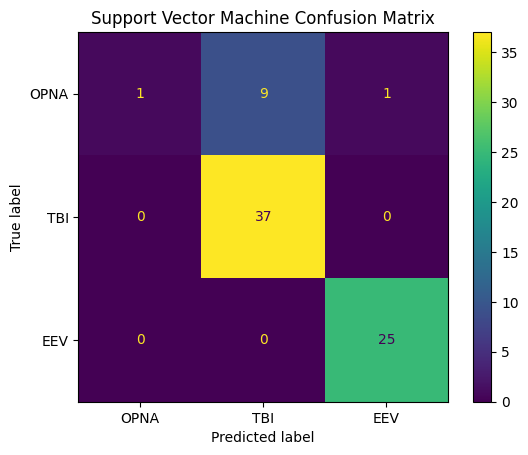

In [ ]:
# Generate confusion matrix
cm_rf = confusion_matrix(y_test, y_pred)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=class_names)
disp_rf.plot(cmap=plt.cm.viridis)  # You can change the colormap if you prefer
plt.title("Support Vector Machine Confusion Matrix")
plt.show()

### Top 100 Features

In [ ]:
top_100_variance_features = variance_df['Feature'].head(100)
top_100_variance_features_df = X[top_100_variance_features]

# Print each column name
for column in top_100_variance_features_df.columns:
    print(column)

CCL2
TIMP1
TTR
PTGS2
LCN2
SPP1
HSPB1
FOXG1
ATF3
TRH
EGR4
COCH
SOSTDC1
NTS
IFIT3
GADD45G
ARC
LGALS3
CD14
GEM
TFPI2
CRYM
NR4A2
CCL4
CCL7
FOSL2
USP18
CEBPB
IFIT1
EGR2
ANXA2
RASL10A
RSAD2
VIP
PRKCD
IER2
HMOX1
FCGR2B
ITPKA
SHOX2
RAMP3
BST2
CXCL10
MAS1
IFITM1
BAG3
ADAMTS1
KLF10
BCL11B
CH25H
NEUROD6
INHBA
GPNMB
LGALS3BP
PLK2
ARL4D
GDA
CLIC1
BTG2
MEST
GBP2
IGFBP2
RGS4
ENPP2
PROCR
ZFP36
LHX9
RERG
LGALS1
SCG2
TSPO
GADD45B
ICAM5
NR4A1
PLCB4
MYC
DDC
SERPING1
CTSC
OPN3
EGR1
PSMB8
IFIT2
PCDH8
SYT17
RGS2
IFITM3
NRGN
POU3F1
CMPK2
SYT1
NTNG1
PRC1
ILF3
CD44
RGS16
KLK6
SLC17A6
RBP1
PSMB9
